## REDD: supervised learning on the energy disaggregation problem

##### Here we test some machine learning algorithm on extracting the refrigerator energy from mains consumptions. REDD contains data of 6 houses. We first train, test the model only on data from house 1 and check how well the model performs on the unseen-pattern data of house 2.  

#### Import packages, read house 1 and house 2 data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")
import glob

In [2]:
def read_label():
    label = {}
    for i in range(1, 7):
        hi = 'low_freq/house_{}/labels.dat'.format(i)
        label[i] = {}
        with open(hi) as f:
            for line in f:
                splitted_line = line.split(' ')
                sulfix = '_' + splitted_line[0] if splitted_line[1].strip() == 'mains' else ''
                label[i][int(splitted_line[0])] = splitted_line[1].strip() + sulfix
    return label
labels = read_label()
for i in range(1,4):
    print('House {}: '.format(i), labels[i], '\n')

House 1:  {1: 'mains_1', 2: 'mains_2', 3: 'oven', 4: 'oven', 5: 'refrigerator', 6: 'dishwaser', 7: 'kitchen_outlets', 8: 'kitchen_outlets', 9: 'lighting', 10: 'washer_dryer', 11: 'microwave', 12: 'bathroom_gfi', 13: 'electric_heat', 14: 'stove', 15: 'kitchen_outlets', 16: 'kitchen_outlets', 17: 'lighting', 18: 'lighting', 19: 'washer_dryer', 20: 'washer_dryer'} 

House 2:  {1: 'mains_1', 2: 'mains_2', 3: 'kitchen_outlets', 4: 'lighting', 5: 'stove', 6: 'microwave', 7: 'washer_dryer', 8: 'kitchen_outlets', 9: 'refrigerator', 10: 'dishwaser', 11: 'disposal'} 

House 3:  {1: 'mains_1', 2: 'mains_2', 3: 'outlets_unknown', 4: 'outlets_unknown', 5: 'lighting', 6: 'electronics', 7: 'refrigerator', 8: 'disposal', 9: 'dishwaser', 10: 'furance', 11: 'lighting', 12: 'outlets_unknown', 13: 'washer_dryer', 14: 'washer_dryer', 15: 'lighting', 16: 'microwave', 17: 'lighting', 18: 'smoke_alarms', 19: 'lighting', 20: 'bathroom_gfi', 21: 'kitchen_outlets', 22: 'kitchen_outlets'} 



In [3]:
def read_merge_data(house):
    path = 'low_freq/house_{}/'.format(house)
    file = path + 'channel_1.dat'
    df = pd.read_table(file, sep = ' ', names = ['unix_time', labels[house][1]], 
                                       dtype = {'unix_time': 'int64', labels[house][1]:'float64'}) 

    num_apps = len(glob.glob(path + 'channel*'))
    for i in range(2, num_apps + 1):
        file = path + 'channel_{}.dat'.format(i)
        data = pd.read_table(file, sep = ' ', names = ['unix_time', labels[house][i]], 
                                       dtype = {'unix_time': 'int64', labels[house][i]:'float64'})
        df = pd.merge(df, data, how = 'inner', on = 'unix_time')
    df['timestamp'] = df['unix_time'].astype("datetime64[s]")
    df = df.set_index(df['timestamp'].values)
    df.drop(['unix_time','timestamp'], axis=1, inplace=True)
    return df
df = {}
for i in range(1,4):
    df[i] = read_merge_data(i)

In [4]:
for i in range(1,3):
    print('House {} data has shape: '.format(i), df[i].shape)
    display(df[i].tail(3))
    

House 1 data has shape:  (406748, 20)


,mains_1,mains_2,oven_x,oven_y,refrigerator,dishwaser,kitchen_outlets_x,kitchen_outlets_y,lighting_x,washer_dryer_x,microwave,bathroom_gfi,electric_heat,stove,kitchen_outlets_x,kitchen_outlets_y,lighting_y,lighting,washer_dryer_y,washer_dryer
2011-05-24 19:56:27,235.46,38.61,0.0,0.0,190.0,0.0,24.0,20.0,2.0,0.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2011-05-24 19:56:30,235.98,38.77,0.0,0.0,189.0,0.0,24.0,20.0,2.0,0.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2011-05-24 19:56:34,235.29,38.83,0.0,0.0,186.0,0.0,26.0,20.0,2.0,0.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


House 2 data has shape:  (316840, 11)


,mains_1,mains_2,kitchen_outlets_x,lighting,stove,microwave,washer_dryer,kitchen_outlets_y,refrigerator,dishwaser,disposal
2011-05-22 23:59:01,10.84,252.61,0.0,9.0,0.0,5.0,0.0,2.0,158.0,0.0,0.0
2011-05-22 23:59:04,10.88,253.02,0.0,9.0,0.0,4.0,0.0,2.0,160.0,0.0,0.0
2011-05-22 23:59:08,10.84,252.77,0.0,9.0,0.0,4.0,0.0,2.0,157.0,0.0,0.0


In [5]:
df = [df[i][['mains_1', 'mains_2', 'microwave']] for i in range(1,4)]

In [6]:
dates = {}
for i in range(0,3):
    dates[i] = [str(time)[:10] for time in df[i].index.values]
    dates[i] = sorted(list(set(dates[i])))
    print('House {0} data contain {1} days from {2} to {3}.'.format(i,len(dates[i]),dates[i][0], dates[i][-1]))
    print(dates[i], '\n')

House 0 data contain 23 days from 2011-04-18 to 2011-05-24.
['2011-04-18', '2011-04-19', '2011-04-20', '2011-04-21', '2011-04-22', '2011-04-23', '2011-04-24', '2011-04-25', '2011-04-26', '2011-04-27', '2011-04-28', '2011-04-30', '2011-05-01', '2011-05-02', '2011-05-03', '2011-05-06', '2011-05-07', '2011-05-11', '2011-05-12', '2011-05-13', '2011-05-22', '2011-05-23', '2011-05-24'] 

House 1 data contain 16 days from 2011-04-18 to 2011-05-22.
['2011-04-18', '2011-04-19', '2011-04-20', '2011-04-21', '2011-04-22', '2011-04-23', '2011-04-24', '2011-04-25', '2011-04-26', '2011-04-27', '2011-04-28', '2011-04-29', '2011-04-30', '2011-05-01', '2011-05-02', '2011-05-22'] 

House 2 data contain 26 days from 2011-04-16 to 2011-05-31.
['2011-04-16', '2011-04-17', '2011-04-18', '2011-04-19', '2011-04-20', '2011-04-21', '2011-04-22', '2011-04-23', '2011-04-24', '2011-04-25', '2011-04-26', '2011-04-27', '2011-04-28', '2011-05-17', '2011-05-18', '2011-05-19', '2011-05-21', '2011-05-22', '2011-05-23', '

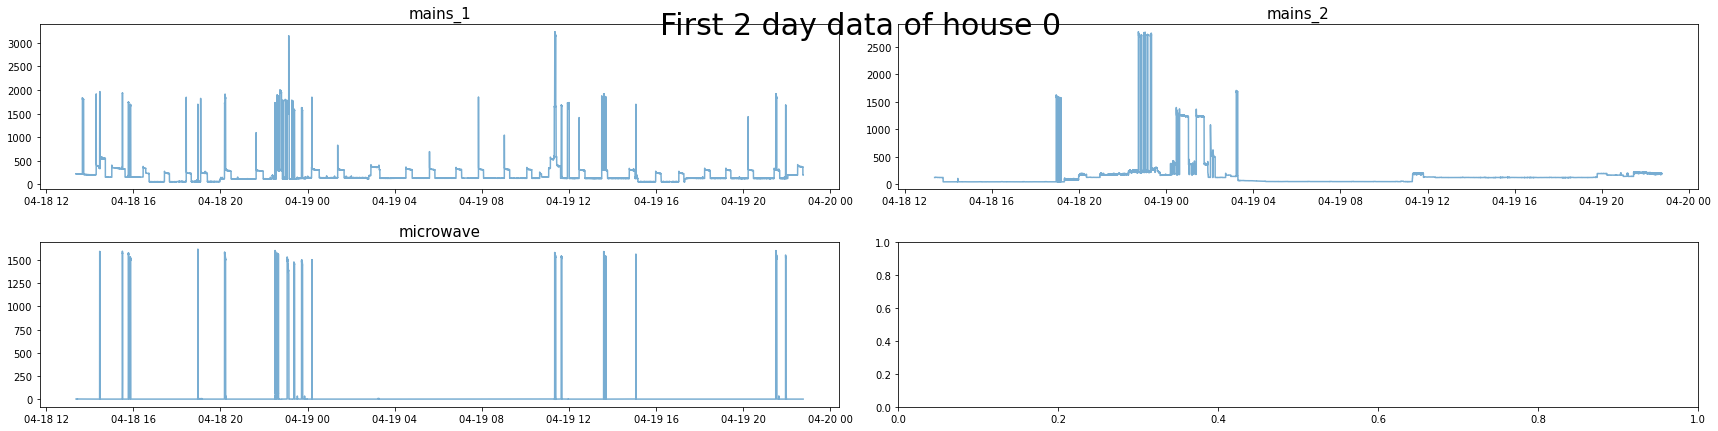

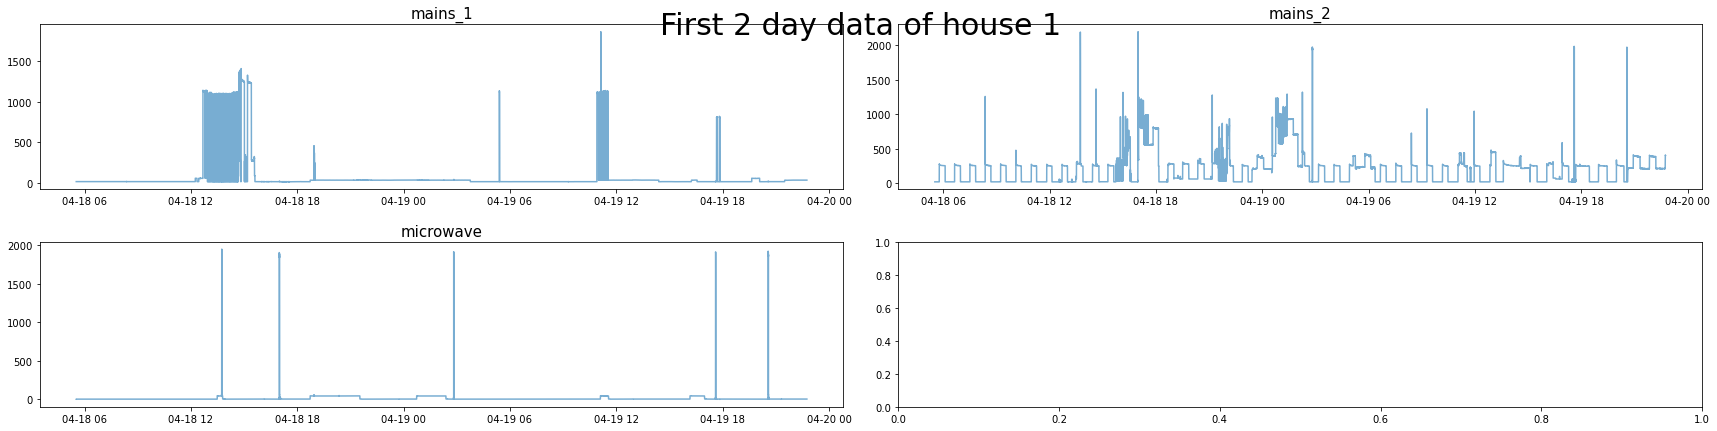

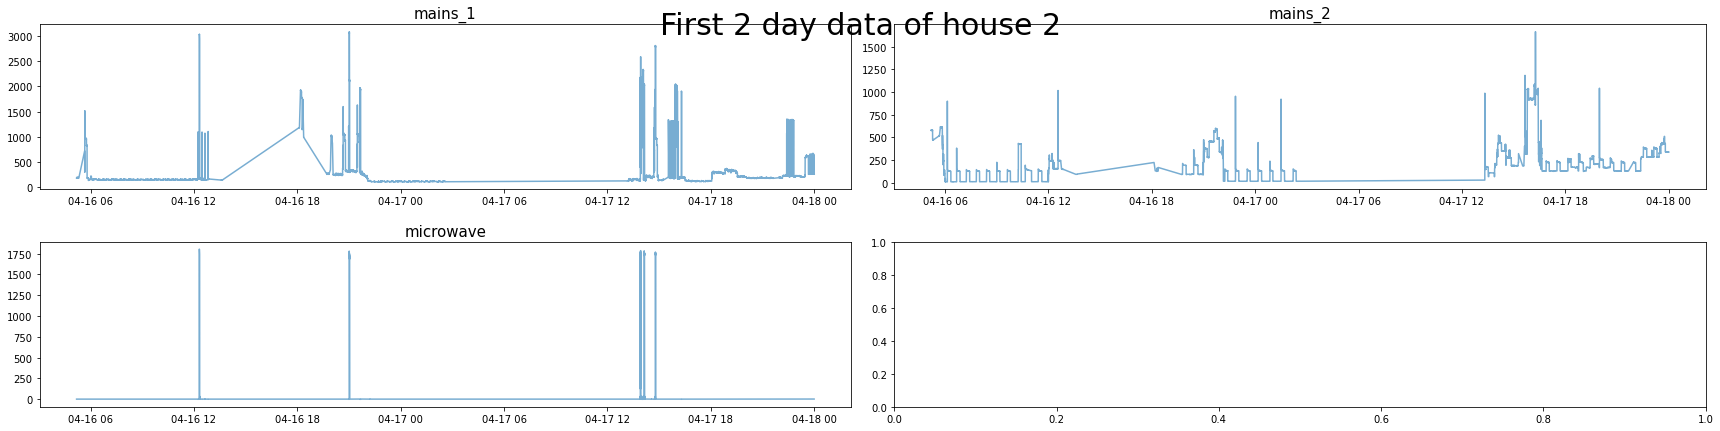

In [7]:
# Plot 2 first day data of house 1 and 2
def plot_df(df, title):
    apps = df.columns.values
    num_apps = len(apps) 
    fig, axes = plt.subplots((num_apps+1)//2,2, figsize=(24, num_apps*2) )
    for i, key in enumerate(apps):
        axes.flat[i].plot(df[key], alpha = 0.6)
        axes.flat[i].set_title(key, fontsize = '15')
    plt.suptitle(title, fontsize = '30')
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)

for i in range(0,3):
    plot_df(df[i].loc[:dates[i][1]], 'First 2 day data of house {}'.format(i))

## Now we will isolate the mains that is related to the microwave device in each house]
Using visual inspection to identify the mains related to the microwave device, we can conclude that in house 1 the mains_1 waveform contains similar peaks to the microwave waveform. In a similar manner, in house 2 and 3 we have respectively, mains_2 and mains_1 related to the microwave waveform

In [8]:
df[0] = df[0][['mains_1', 'microwave']]
df[1] = df[1][['mains_2', 'microwave']]
df[2] = df[2][['mains_1', 'microwave']]

In [9]:
for i, df_i in enumerate(df):
    df_i.to_csv(f'house{i+1}.csv')